In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from empiricaldist import Pmf
from empiricaldist import Cdf

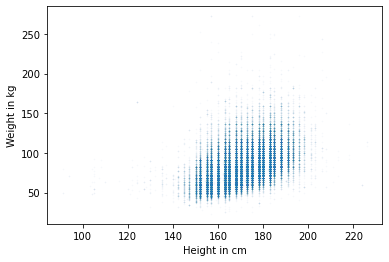

In [2]:
brfss = pd.read_hdf('brfss.hdf5','brfss')
height = brfss['HTM4']
weight=brfss['WTKG3']
plt.plot(height,weight,'o',markersize=1,alpha =0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

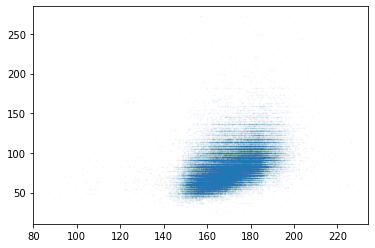

In [3]:
height_jitter = height +np.random.normal(0,2,size=len(brfss))
plt.plot(height_jitter,weight, 'o',markersize=1,alpha=.02)
plt.show()

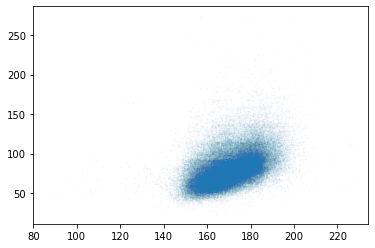

In [4]:
weight_jitter = weight + np.random.normal(0,2,size=len(brfss))
plt.plot(height_jitter,weight_jitter, 'o',markersize=1,alpha=.02)
plt.show()

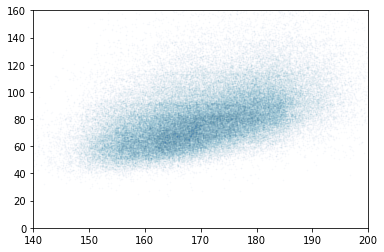

In [5]:
plt.plot(height_jitter,weight_jitter, 'o',markersize=1,alpha=.02)
plt.axis([140,200,0,160])
plt.show()

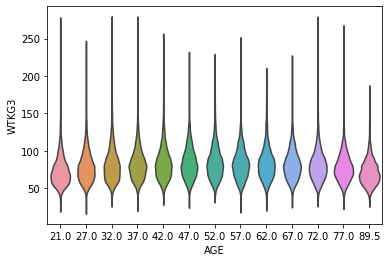

In [6]:
data=brfss.dropna(subset=['AGE','WTKG3'])
sns.violinplot(x='AGE',y='WTKG3',data=data,inner=None)
plt.show()

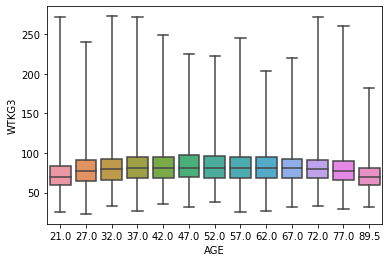

In [7]:
sns.boxplot(x="AGE",y='WTKG3',data=data,whis=10)
plt.show()

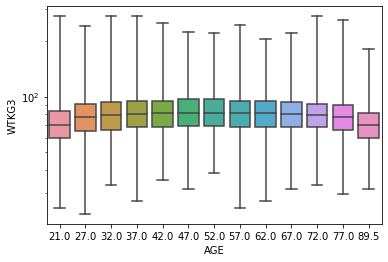

In [8]:
sns.boxplot(x="AGE",y='WTKG3',data=data,whis=10)
plt.yscale('log')
plt.show()

In [9]:
columns=['HTM4','WTKG3','AGE']
subset=brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [10]:
subset=brfss.dropna(subset=['WTKG3','HTM4'])
xs=subset['HTM4']
ys=subset['WTKG3']
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)


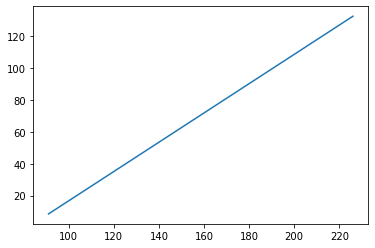

In [11]:
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,'-')

# 1. Exploring relationships
So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

2. Height and weight
As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

3. Scatter plot
A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. To demonstrate, I'll load the BRFSS dataset and extract the variables for height in centimeters and weight in kilograms. pyplot provides a scatter() function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use plot() with the format string 'o', which plots a circle for each data point. And, as always, we have to label the axes.

4. Overplotting
Here's what it looks like. In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

5. Transparency
One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with alpha=0.02. This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

6. Marker size
With markersize=1 and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

7. Jittering
Adding random noise like this is called "jittering". In this example, I added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

8. More jittering
Here's the code. And here's the result. Finally, let's zoom in on the area where most of the data points are.

9. Zoom
The pyplot function axis() sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like. Finally, we have a reliable picture of the relationship between height and weight.

10. Before and after
Here's the plot we started with and the one we ended with. Clearly, they are very different, and they suggest different stories about the relationship between these variables. The point of this example is that it takes some effort to make an effective scatter plot.

11. Let's explore!
In the next lesson we'll see other ways to visualize relationships between variables, but first you'll have a chance to explore the relationship between age and weight.

## PMF of age
Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

Extract the variable 'AGE' from the DataFrame brfss and assign it to age.

Get the PMF of age and plot it as a bar chart.

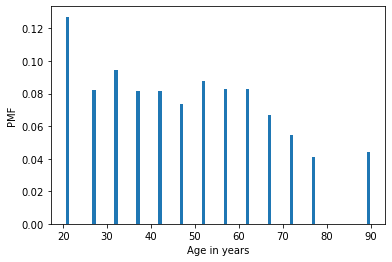

In [12]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## Scatter plot
Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

Instructions
100 XP
Make a scatter plot of weight and age with format string 'o' and alpha=0.1.

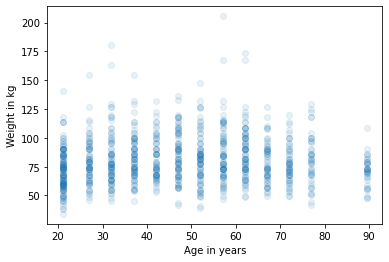

In [13]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',alpha=.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

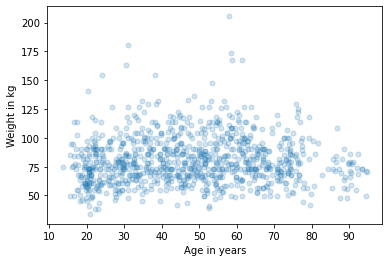

In [14]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5,size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',markersize=5,alpha=.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')


Instructions

Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('_HTMG10') group. Specify whis=10, just as was done in the video.

Add a line to plot the y-axis on a logarithmic scale.

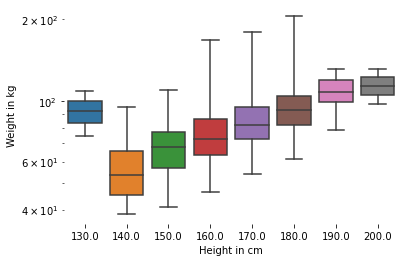

In [15]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10',y='WTKG3',data=data,whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


## Distribution of income
In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

Instructions
100 XP


Extract 'INCOME2' from the brfss DataFrame and assign it to income.

Plot the PMF of income as a bar chart.

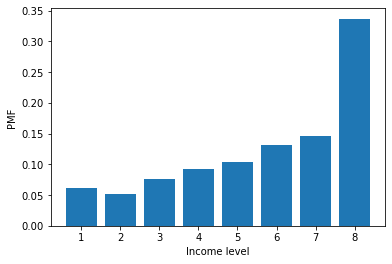

In [16]:
brfss = pd.read_hdf('brfss.hdf5','brfss') #needed to be added to get teh right shape to the data after only taking the first 1000 before
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

## Income and height
Let's now use a violin plot to visualize the relationship between income and height.

Instructions
100 XP
Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.

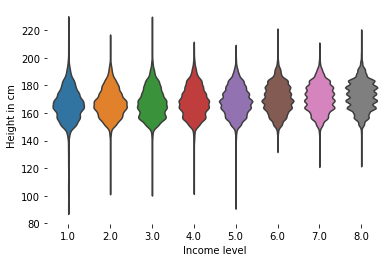

In [17]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2',y='HTM4',data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


# 1. Correlation
In the previous lesson, we visualized relationships between pairs of variables. In this lesson we'll learn about the coefficient of correlation, which quantifies the strength of these relationships.

2. Correlation coefficient
When people say "correlation" casually, they might mean any relationship between two variables. In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables. To demonstrate, I'll select three columns from the BRFSS dataset, like this. The result is a DataFrame with just those columns. Now we can use the corr() method, like this.

3. Correlation matrix
The result is a "correlation matrix". Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1. The next entry is more interesting; the correlation of height and weight is about 0 point 47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa. The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height. The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?

4. Weight and age
Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is nonlinear.

5. Nonlinear relationships
But correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. To demonstrate, I'll generate some fake data: xs contains equally-spaced points between -1 and 1. ys is xs squared plus some random noise. Here's the scatter plot of xs and ys. It's clear that this is a strong relationship; if you are given `x`, you can make a much better guess about y. But here's the correlation matrix; the computed correlation is close to 0. In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. This is one of the reasons I think correlation is not such a great statistic.

6. You keep using that word
There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope. If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

7. Strength of relationship
For example, suppose we are concerned about the health effects of weight gain, so we plot weight versus age, from 20 to 50 years old. Here are two fake datasets I generated. The one on the left has higher correlation, about 0 point 76 compared to 0 point 47. But on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line.

8. Let's practice!
In the next lesson, you'll learn how to estimate that slope. But first, let's practice with correlation.

## Computing correlations
The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

Instructions
100 XP

From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.

Compute the correlation matrix for these variables.

In [18]:
# Select columns
columns = ['AGE','INCOME2',"_VEGESU1"]
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


# 1. Simple regression
In the previous lesson we saw that correlation does not always measure what we really want to know. In this lesson, we look at an alternative - simple linear regression.

2. Strength of relationship
Let's look again at an example from the previous lesson, a hypothetical relationship between weight and age. I generated two fake datasets to make a point: The one on the left has higher correlation, about 0 point 76 compared to 0 point 48. But in the one on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this context, the statistic we probably care about is the slope of the line, not the correlation coefficient.

3. Strength of effect
To estimate the slope of the line, we can use linregress() from the SciPy stats module. The result is a LinRegressResult object that contains five values: slope is the slope of the line of best fit for the data; intercept is the intercept. For Hypothetical #1, the estimated slope is about 0.019 kilograms per year or about 0.6 kilograms over the 30-year range.

4. Strength of effect
Here are the results for Hypothetical #2. The estimated slope is about 10 times higher: about 0 point 18 kilograms per year or 6 kilograms per 30 years, What's called rvalue here is correlation, which confirms what we saw before; the first example has higher correlation, about 0 point 76 compared to 0 point 48. But the strength of the effect, as measured by the slope of the line, is about 10 times higher in the second example.

5. Regression lines
We can use the results from linregress() to compute the line of best fit: first we get the min and max of the observed xs; then we multiply by the slope and add the intercept. And plot the line. Here's what that looks like for the first example. And the same thing for the second example. The visualization here might be misleading unless you look closely at the vertical scales; the slope on the right is almost 10 times higher.

6. Height and weight
Now let's look at an example with real data. Here's the scatter plot of height and weight again, from Lesson 1.

7. Regression line
Now we can compute the regression line. linregress() can't handle NaNs, so we have to use dropna() to remove rows that are missing the data we need. Now we can compute the linear regression. And here are the results. The slope is about 0 point 9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

8. Line of best fit
As before, we can compute the line of best fit and plot it. And here's what that looks like. The slope of this line seems consistent with the scatter plot.

9. Linear relationships
However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. Here's the scatter plot of weight versus age, which you saw in a previous exercise. People in their 40s are the heaviest; younger and older people are lighter. So the relationship is nonlinear.

10. Nonlinear relationships
If we don't look at the scatter plot and blindly compute the regression line, here's what we get. The estimated slope is only 0 point 02 kilograms per year, or 0 point 6 kilograms in 30 years.

11. Not a good fit
And here's what the line of best fit looks like. A straight line does not capture the relationship between these variables well.

12. Let's practice!
In the next lesson, we'll learn how to use multiple regression to estimate non-linear relationships. But first, let's practice simple regression.

# #Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

Instructions
100 XP
Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.
Compute the simple linear regression of these variables.

In [19]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


## Fit a line
Continuing from the previous exercise:

Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

Instructions
100 XP
Set fx to the minimum and maximum of xs, stored in a NumPy array.
Set fy to the points on the fitted line that correspond to the fx.

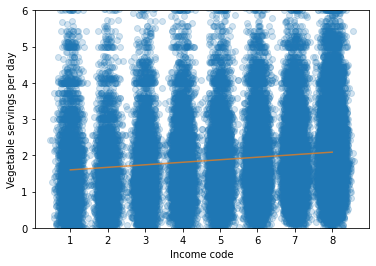

In [20]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope *fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()